Wahlpflichtfach Künstliche Intelligenz II: Praktikum | 

---

# 01 - Einführung

[**TensorFlow**](https://www.tensorflow.org) ist ein Deep Learning Framework, das vom Google Brain Team entwickelt wurde. Im November 2015 wurde das erste Release veröffentlicht.

Nachdem immer mehr und mehr Wissenschaftler zu [**PyTorch**](https://pytorch.org), das im Oktober 2016 von Facebook AI Research veröffentlicht wurde, gewechselt sind, da sich dort neue Konzepte besser bzw. einfacher ausprobieren lassen, hat Google im September 2019 TensorFlow 2.0 veröffentlicht, das verspricht die Vorteile von PyTorch zu integrieren. 

Da Tensorflow normalerweise in der Industrie verwendet wird und eine größere Community hat, werden wir im Folgenden TensorFlow in der Version 2.X verwenden. 

In [49]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [50]:
%matplotlib inline

In [51]:
print(tf.__version__)

2.13.1


## Was ist ein Tensor?
Lasst uns zunächst das Konzept eines Tensors verstehen. Für unseren Zweck können wir einen Tensor als ein hochdimensionales Array betrachten. 
- Tensor 0. Ordnung = Skalar
- Tensor 1. Ordnung = Vektor
- Tensor 2. Ordnung = Matrix
- Tensor 3. Ordnung = Tensor

### Wie werden Matrizen in Numpy abgebildet?

In [52]:
# A NumPy array is an arbitray dimensional matrix to store numbers in
arr = np.reshape(np.arange(9),(3,3))
print(arr)
print(arr.shape)
print("------------------")

# Access dimensions of the shape.
print(arr.shape[0])
print(arr.shape[-1])
print("------------------")

# Reshaping an array.
arr1 = np.reshape(arr, newshape=(9,1))
print(arr1)
arr2 = np.reshape(arr, newshape=(-1,1)) # The -1 makes numpy infer itself the missing dimension.
print(arr2)
print("------------------")

# Indexing allows you to access specific entries of an array.
print(arr[2,1]) # row 2 (third), column 1 (second).
print(arr[1,2]) # row 1 (second), column 2 (third).
print("------------------")

# Slicing allows you to retrieve parts of an array.
print(arr[:,1]) # All rows, collumn 1.
print(arr[0:2,:]) # Rows from 0 (include) to 2 (exclude), all columns. 

[[0 1 2]
 [3 4 5]
 [6 7 8]]
(3, 3)
------------------
3
3
------------------
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
------------------
7
5
------------------
[1 4 7]
[[0 1 2]
 [3 4 5]]


### Können wir auch eine weiter Dimension zu unserem numpy-Array hinzufügen?

In [53]:
# But the exact same things work in higher dimensions!
arr = np.reshape(np.arange(27), (3,3,3))
print(arr)
print(arr.shape)
print("------------------")

# Indexing.
print(arr[0,1,2])
print("------------------")

# Slicing.
print(arr[:,2,:])

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
(3, 3, 3)
------------------
5
------------------
[[ 6  7  8]
 [15 16 17]
 [24 25 26]]


### Unterschied zwischen dem TensorFlow Tensor und dem numpy Array
Grundsätzlich sind TensorFlow Tensoren und numpy Arrays das Gleiche. Und auch wieder nicht. Den Tensoren sind eigentlich Operationen.

In [54]:
tensor = tf.convert_to_tensor(arr)
print(tensor)

tf.Tensor(
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]], shape=(3, 3, 3), dtype=int64)


Es besteht die Möglichkeit ein Numpy Array in einen Tensorflow Tensor zu konvertieren. Dies ist aber auch implizit mittels einer Operation möglich bei der das Ergebnis dann als Tensor gespeichert wird.

In [55]:
tensor = tf.multiply(42, arr)
print(arr)
print(tensor)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
tf.Tensor(
[[[   0   42   84]
  [ 126  168  210]
  [ 252  294  336]]

 [[ 378  420  462]
  [ 504  546  588]
  [ 630  672  714]]

 [[ 756  798  840]
  [ 882  924  966]
  [1008 1050 1092]]], shape=(3, 3, 3), dtype=int32)


Wenn die Variable bereits ein Tensor ist können alle normalen mathematischen Operationen (+, -, *, ,/ usw.) verwendet werden.

In [56]:
print(tensor/42)
print(tf.divide(tensor,42)) # That's the same thing.
print(tensor/42+tensor/42)

tf.Tensor(
[[[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 9. 10. 11.]
  [12. 13. 14.]
  [15. 16. 17.]]

 [[18. 19. 20.]
  [21. 22. 23.]
  [24. 25. 26.]]], shape=(3, 3, 3), dtype=float64)
tf.Tensor(
[[[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 9. 10. 11.]
  [12. 13. 14.]
  [15. 16. 17.]]

 [[18. 19. 20.]
  [21. 22. 23.]
  [24. 25. 26.]]], shape=(3, 3, 3), dtype=float64)
tf.Tensor(
[[[ 0.  2.  4.]
  [ 6.  8. 10.]
  [12. 14. 16.]]

 [[18. 20. 22.]
  [24. 26. 28.]
  [30. 32. 34.]]

 [[36. 38. 40.]
  [42. 44. 46.]
  [48. 50. 52.]]], shape=(3, 3, 3), dtype=float64)


Es ist auch einfach möglich einen Tensor in ein numpy Array zurückzuwandeln.

In [57]:
print(tensor.numpy())

[[[   0   42   84]
  [ 126  168  210]
  [ 252  294  336]]

 [[ 378  420  462]
  [ 504  546  588]
  [ 630  672  714]]

 [[ 756  798  840]
  [ 882  924  966]
  [1008 1050 1092]]]


## Erstellen eines kleinen Regressions-Datensatz
Für unser erstes TensorFlow-Modell erstellen wir uns einen eigenen Dummy-Datensatz. 

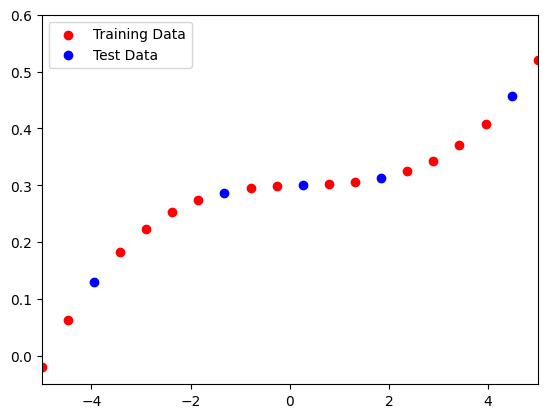

In [58]:
xs = np.linspace(-5,5, 20, dtype=np.float32)

def f(x):
    return 0.002*(x**3-x**2+2*x)+0.3

ys = f(xs)

training_data_ids = np.random.choice(20,15, replace=False)
test_data_ids = np.array([i if i not in training_data_ids else 99 for i in range(20)])
test_data_ids = test_data_ids[test_data_ids < 21]
training_data_xs = xs[training_data_ids]
training_data_ys = ys[training_data_ids]
test_data_xs = xs[test_data_ids]
test_data_ys = ys[test_data_ids]

plt.scatter(training_data_xs, training_data_ys, c='red')
plt.scatter(test_data_xs, test_data_ys, c='blue')
plt.legend(("Training Data","Test Data"), loc='upper left')
plt.xlim(-5,5)
plt.ylim(-0.05,0.6)
plt.show()

In [59]:
# First understand the shape that your data has.
print(training_data_xs.shape)
print(training_data_ys.shape)
print(test_data_xs.shape)
print(test_data_ys.shape)

(15,)
(15,)
(5,)
(5,)


### TensorFlow Dataset
Um diese Daten in TensorFlow zu verwenden, müssen wir den Datensatz in ein `tf.data.Dataset` umwandeln ([Dokumentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)). In unserem Fall verwenden wir dafür die Methode `tf.data.Dataset.from_tensor_slices()`.

In [60]:
train_dataset = tf.data.Dataset.from_tensor_slices((training_data_xs, training_data_ys))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_xs, test_data_ys))

Um über den Datensatz zu iterieren kann einfach der `in` Operator verwendet werde. Der Testdatensatz besteht aus 5 Datenpunkten, wobei jeder Datenpunkt durch ein Tupel dargestellt wird, das die Eingabe und den Zielwert enthält 

In [61]:
for elem in test_dataset:
    print(elem)

(<tf.Tensor: shape=(), dtype=float32, numpy=-3.9473684>, <tf.Tensor: shape=(), dtype=float32, numpy=0.13003354>)
(<tf.Tensor: shape=(), dtype=float32, numpy=-1.3157895>, <tf.Tensor: shape=(), dtype=float32, numpy=0.2867182>)
(<tf.Tensor: shape=(), dtype=float32, numpy=0.2631579>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3009506>)
(<tf.Tensor: shape=(), dtype=float32, numpy=1.8421053>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31308356>)
(<tf.Tensor: shape=(), dtype=float32, numpy=4.4736843>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4569384>)


Um den Datensatz als ganzes in das Netzwerk zu schleusen, müssen wir es batchen. Dadurch können wir die Verlustfunktion für den ganzen Datensatz minimieren. Durch das Batchen sind die Datenpunkte jetzt in zwei Arrays gespeichert -  ein Array für den Input und ein Array für den Zielwert.

In [62]:
train_dataset = train_dataset.batch(15)
test_dataset = test_dataset.batch(5)

for elem in test_dataset:
    print(elem)   

(<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-3.9473684, -1.3157895,  0.2631579,  1.8421053,  4.4736843],
      dtype=float32)>, <tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.13003354, 0.2867182 , 0.3009506 , 0.31308356, 0.4569384 ],
      dtype=float32)>)


## Das erste neuronal Netz
Jedes neuronale Netz besteht aus mehreren Schichten. Die Schichten sind also die Bausteine. TensorFlow 2.x enthält bereits viele eingebaute Schichten, die Ihr hier finden könnt: https://www.tensorflow.org/api_docs/python/tf/keras/layers.

Allerdings werden wir zunächst lernen, wie wir eigene Schichten entwickelt.

### Einfache, lineare Schicht
Unsere erste Schicht ist eine einfache, lineare Schicht, die nur den Drive berechntet. Wor verwenden hier keine Aktivierungsfunktion.

Um eine Schicht zu definieren, brauchen wir eine Klasse, die von `tf.keras.layers.Layer` erbt.

In [63]:
from keras.layers import Layer

class Linear(Layer):
    """y = w.x + b"""
    
    def __init__(self, units):
        super(Linear, self).__init__()
        self.units = units
        
    def build(self, input_shape):
        self.w = self.add_weight(
                        shape=(input_shape[-1], self.units),
                        initializer=tf.random_normal_initializer(),
                        trainable=True
        )
        self.b = self.add_weight(
                        shape=(self.units,),
                        initializer=tf.random_normal_initializer(),
                        trainable=True
        )
     
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

### Testen der einfachen, linearen Schicht

In [64]:
linear_layer = Linear(4)

x = tf.ones((1,4))
y = linear_layer(x)

print(x)
print(y)

tf.Tensor([[1. 1. 1. 1.]], shape=(1, 4), dtype=float32)
tf.Tensor([[-0.08118311 -0.00159353  0.0565376  -0.07379332]], shape=(1, 4), dtype=float32)


### Mehrere Schichten verbinden
Um mehrere Schichten miteinander zu verknüpfen, können wir diese in einer neuen Klasse, die wiederum eine Schicht ist kombinieren.

In [65]:
class MLP(Layer):
    
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden_layer = Linear(512)
        self.output_layer = Linear(1)
        
    def call(self, x):
        x = self.hidden_layer(x)
        x = tf.nn.relu(x)
        x = self.output_layer(x)
        return x

### Training des neuronalen Netzes

In [66]:
tf.keras.backend.clear_session()

mlp = MLP()

Um das neuronale Netz zu trainieren, müssen wir zuerst noch die Verlustfunktion ([Dokumentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses))und den Optimierer ([Dokumentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)) bestimmen.

In [67]:
mse = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

Dann müssen wir nur noch unsere Trainingsschleife bauen.

In [68]:
train_losses = []
test_losses = []
epochs = []

for epoch in range(1000):
    epochs.append(epoch)
    
    for (x,y) in train_dataset:
        
        x = tf.reshape(x, shape=(-1,1))

        with tf.GradientTape() as tape:
            output = mlp(x)
            loss = mse(y, output)
            train_losses.append(loss)
            gradients = tape.gradient(loss, mlp.trainable_variables)

        optimizer.apply_gradients(zip(gradients, mlp.trainable_variables))        

    for (x,y) in test_dataset:
        x = tf.reshape(x, shape=(-1,1))
        output = mlp(x)
        loss = mse(y, output)       
        test_losses.append(loss)

Anschließend können wir mit unseren gesammelten Werten den Traingsprozess visualisieren.

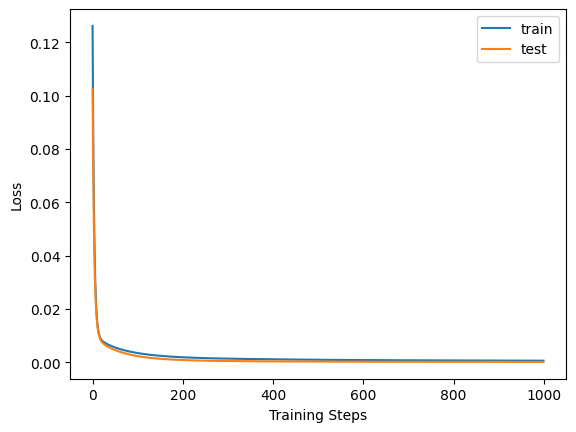

In [69]:
plt.figure()
plt.plot(epochs, train_losses)
plt.plot(epochs, np.array(test_losses))
plt.legend(("train","test"))
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.show()

Und zum Schluss können wir auch noch die Approximation visualisieren. 

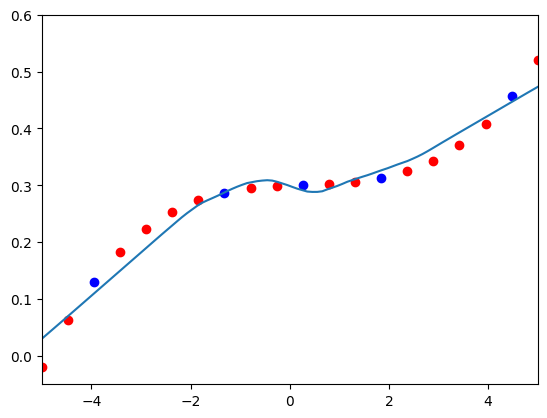

In [70]:
plt.figure()
plt.scatter(training_data_xs, training_data_ys, c='red')
plt.scatter(test_data_xs, test_data_ys, c='blue')

xs = np.linspace(-5,5,100, dtype=np.float32)
xs = np.reshape(xs, newshape=(-1,1))
ys = mlp(xs)

plt.plot(xs,ys)
plt.xlim(-5,5)
plt.ylim(-0.05,0.6)
plt.show()

---

Wahlpflichtach Künstliche Intelligenz II: Praktikum 